<a href="https://colab.research.google.com/github/singhsweta/Python-EDA/blob/main/Merger_and_Acquisitions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Acquisitions by Tech Companies (EDA)**

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.pyplot import figure
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns

plt.rcParams['figure.figsize']=(12,10)
#plt.rcParams['font.family']='times new roman'
plt.rcParams['font.size']=17

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
acq_data=pd.read_excel("Acquistion.xlsx")
acq_data.head()

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
0,1,Apple,1988.0,Mar,Network Innovations,Software,NaN,NaN,NaN,NaN
1,2,Apple,1988.0,Jun,Orion Network Systems,Computer Software,NaN,NaN,NaN,NaN
2,3,Apple,1988.0,Jun,Styleware,Computer software,NaN,NaN,NaN,NaN
3,4,Apple,1988.0,Jul,Nashoba Systems,Computer software,NaN,NaN,NaN,NaN
4,5,Apple,1989.0,Jan,Coral Software,Computer software,NaN,NaN,NaN,NaN


In [20]:
acq_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1455 non-null   int64  
 1   Parent Company     1455 non-null   object 
 2   Acquisition Year   1427 non-null   float64
 3   Acquisition Month  1397 non-null   object 
 4   Acquired Company   1455 non-null   object 
 5   Business           1181 non-null   object 
 6   Country            341 non-null    object 
 7   Acquisition Price  510 non-null    object 
 8   Category           10 non-null     object 
 9   Derived Products   403 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 113.8+ KB


In [76]:
# Converting columns into numerical values
acq_data["Acquisition Price"]=pd.to_numeric(acq_data["Acquisition Price"],errors="coerce")
acq_data["Acquisition Year"]=pd.to_numeric(acq_data["Acquisition Year"],errors="coerce")
acq_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1455 non-null   int64  
 1   Parent Company     1455 non-null   object 
 2   Acquisition Year   1427 non-null   float64
 3   Acquisition Month  1397 non-null   object 
 4   Acquired Company   1455 non-null   object 
 5   Business           1181 non-null   object 
 6   Country            341 non-null    object 
 7   Acquisition Price  383 non-null    float64
 8   Category           10 non-null     object 
 9   Derived Products   403 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 113.8+ KB


In [21]:
acq_data.shape

(1455, 10)

## **Number of acquisitions over the years**

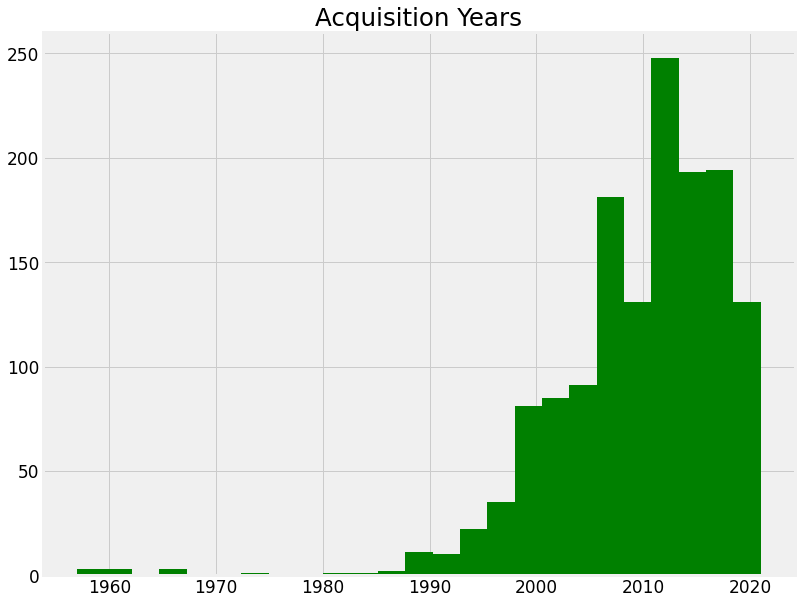

In [60]:
plt.title("Acquisition Years")
plt.hist(acq_data["Acquisition Year"],bins=25,color="green")
plt.show()

***The number of acquisitions by tech companies have dramatically increased since the 1990s. This is somewhat representative of the Tech Industry which had a dramatic growth period in the 1990s.***

## **Companies having the highest number of acquisitions**

In [49]:
acq_data.head()
no_acq=acq_data.groupby("Parent Company").count().reset_index()
no_acq.sort_values(by="Acquired Company",inplace=True,ascending=False)
no_acq

,Parent Company,ID,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
11,Microsoft,258,258,258,258,258,0,61,0,0
8,Google,244,244,243,244,244,0,49,0,238
10,Ibm,182,182,182,182,182,180,89,0,0
9,Hp,129,101,93,129,129,1,36,0,0
2,Apple,123,123,114,123,123,0,39,0,0
1,Amazon,108,108,106,108,0,0,39,0,83
7,Facebook,93,93,93,93,0,90,76,0,30
13,Twitter,65,65,65,65,64,23,14,10,0
6,Ebay,63,63,63,63,63,0,32,0,0
0,Adobe,52,52,51,52,0,0,14,0,0


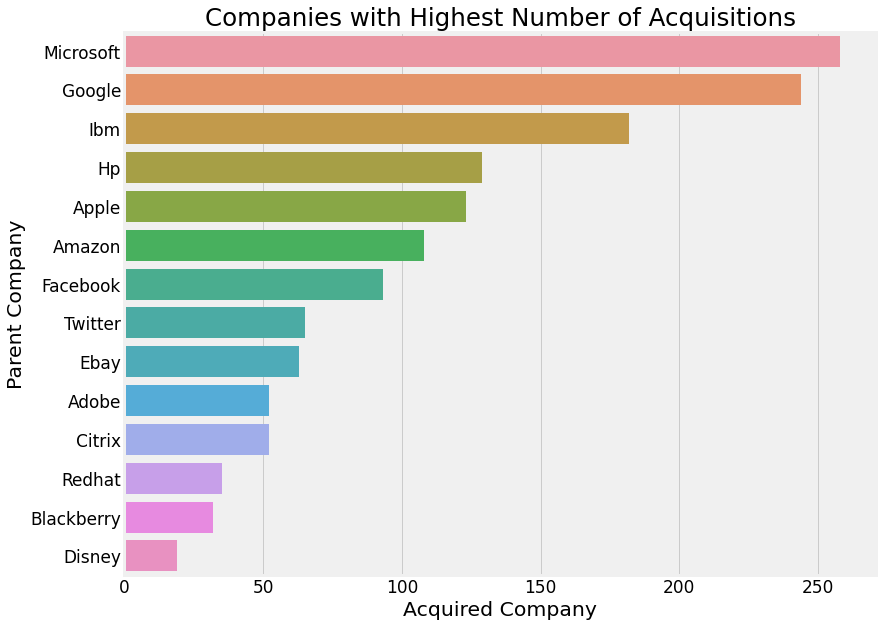

In [62]:
plt.title('Companies with Highest Number of Acquisitions')
sns.barplot(x="Acquired Company",y="Parent Company",data=no_acq)
plt.show()

***It is seems that companies who have a stronger focus on computer software have a higher number of acquisitions. Perhaps this is because companies that specialize in computer software generate more revenue that supports these acquisitions.***

## **Most popular businesses to acquire**

In [68]:
popular=acq_data['Business'].value_counts().reset_index()
popular.rename({"index":"Business","Business":"Total"},axis=1,inplace=True)
popular

,Business,Total
0,Software,52
1,Computer software,37
2,Video games,18
3,Information technology,15
4,Internet software,12
...,...,...
859,Application discovery and dashboard visualization,1
860,GPS navigation software,1
861,Digital magazine subscription service,1
862,Cloud Computing,1


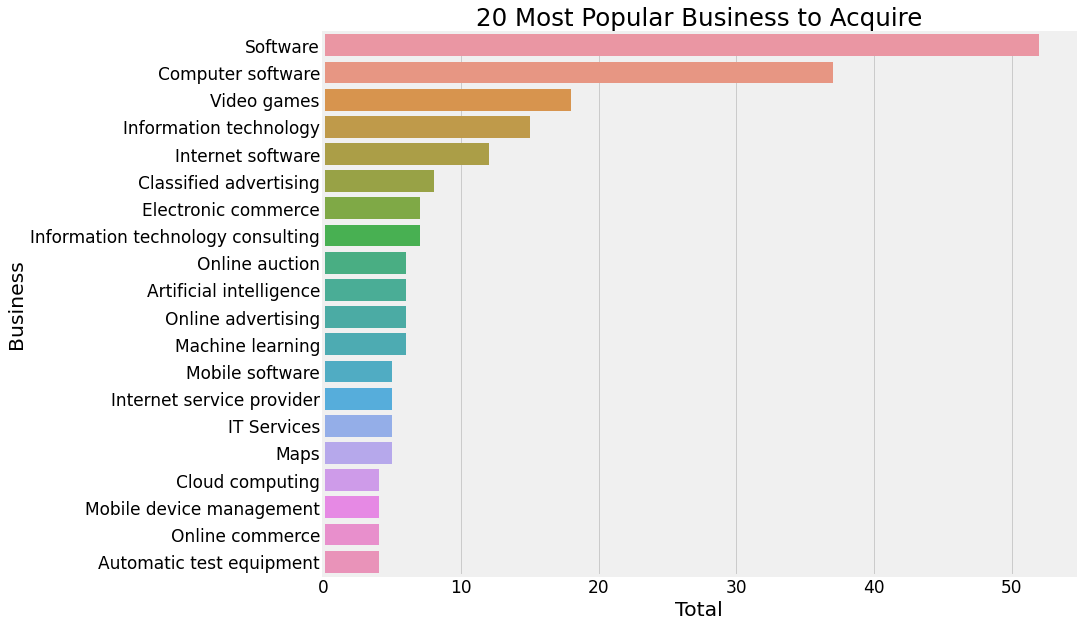

In [72]:
plt.title("20 Most Popular Business to Acquire")
sns.barplot(x="Total",y="Business",data=popular[:20])
plt.show()

***It appears that there is a disproportionately high number of software businesses that were acquired by tech companies. This supports our earlier observation that businesses that have a strong focus on Software may generate more revenue.***

## **Trend of the Acquisition Price**

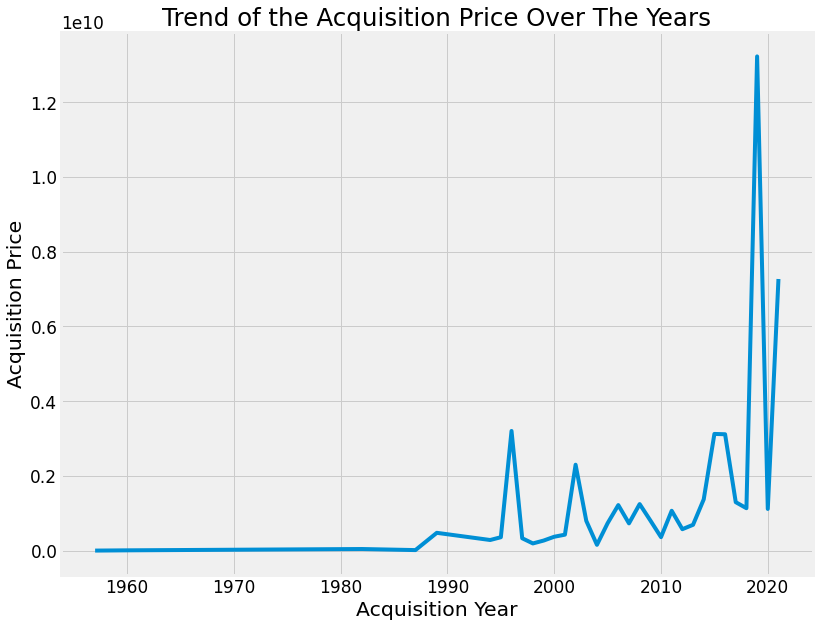

In [81]:
plt.title("Trend of Acquisition Price Over The Years")
sns.lineplot(x=acq_data["Acquisition Year"],y=acq_data["Acquisition Price"],data=acq_data,ci=None)
plt.show()

***If we observe the bar chart, we can tell that that the acquisition prices are very volatile. However, it seems that the prices have been increasing since 1990 despite the volatility***

## **Most expensive companies to acquire**

In [94]:
exp_companies=acq_data.sort_values(by="Acquisition Price",ascending=False).reset_index()[:20]
exp_companies["Acquisition Year"]=exp_companies["Acquisition Year"].fillna(0) #replacing NaN with 0
exp_companies["Acquisition Year"]=exp_companies["Acquisition Year"].astype('int') #converting year column to integer
exp_companies[["Parent Company","Acquisition Year","Acquired Company","Acquisition Price"]]

,Parent Company,Acquisition Year,Acquired Company,Acquisition Price
0,Disney,2019,21st Century Fox,7.130000e+10
1,Twitter,2015,Periscope,5.010000e+10
2,Ibm,2019,Red Hat,3.400000e+10
3,Microsoft,2016,LinkedIn,2.620000e+10
4,Hp,2002,Compaq,2.500000e+10
5,Microsoft,2021,Nuance Communications,1.970000e+10
6,Facebook,2014,WhatsApp,1.900000e+10
7,Disney,1996,Capital Cities/ABC Inc.,1.900000e+10
8,Hp,2008,Electronic Data Systems,1.390000e+10
9,Amazon,2017,Whole Foods Market,1.370000e+10


***The information on in the table above supports our earlier conclusion that acquisition prices were higher in the more recent years. The most expensive company to acquire was 21st Century Fox in the year 2019.***

## **Countries with Most Acquisitions**

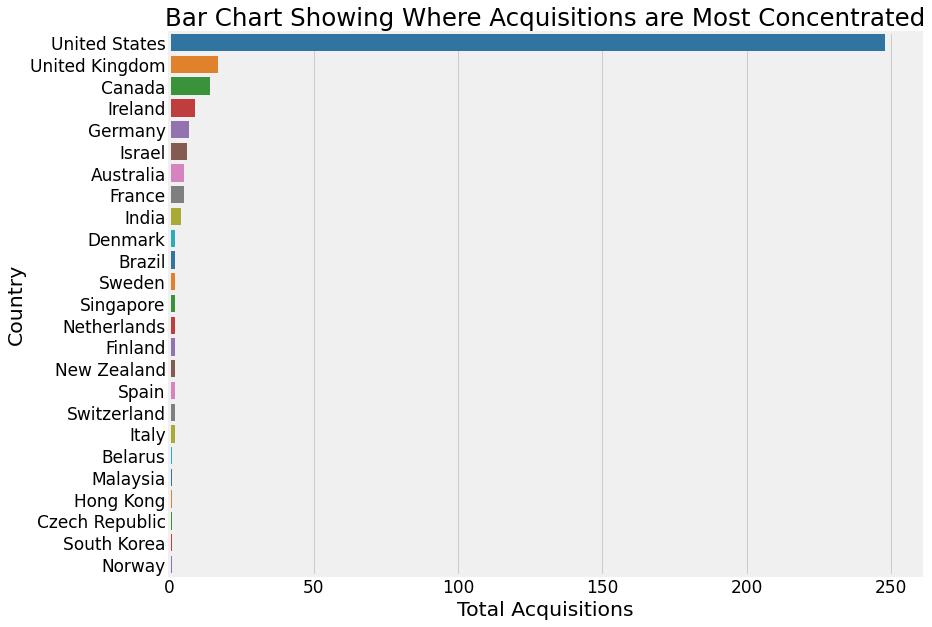

In [103]:
country_df=acq_data["Country"].value_counts().reset_index()
country_df.rename({"index":"Country","Country":"Total Acquisitions"},axis=1,inplace=True)

plt.title("Bar Chart Showing Where Acquisitions are Most Concentrated")
sns.barplot(x="Total Acquisitions",y="Country",data=country_df,palette="tab10")
plt.show()